# Cell Oracle TF plots for HAT7 and GTL1 in Cortex GRNs from BR timecourse

In [1]:
library(tidyverse)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(cowplot)
library(patchwork)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: grid

ComplexHeatmap version 2.11.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPa

In [2]:
# read in cortex GRN scores from CellOracle analysis of BR time course
Cortex <- read_csv("../data/CellOracle_BR-timecourse/cortex_SCT_celloracle_gene_score_iGRN.csv") %>%
rename("gene"=X1)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character(),
  name = col_character(),
  role = col_character(),
  cluster = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [3]:
# adjust names to match other figures

Cortex$name<- gsub("AT-GTL1", "GTL1", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Cortex$name<- gsub("ATHB-23", "HB-23", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Cortex$name<- gsub("ATHB-20", "HB-20", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

Cortex$name<- gsub("ATHB-13", "HB-13", Cortex$name, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

In [5]:
options(repr.plot.width=5, repr.plot.height=5)



# top 10 TFs in BL 2 hour elongating cortex GRN
BL2hr_elong_cortex_10 <- Cortex %>%
             filter(cluster=="Elongation_Cortex_BRZ_2_BL") %>%
            top_n(wt = degree_out, n = 10)




# genes to highlight 
HAT7__HB_degree <- filter(BL2hr_elong_cortex_10, name %in% c("HAT7", "GTL1", "HB-23", "HB-13", "HB-20"))

In [6]:
(BL2hr_elong_cortex_10 <- arrange(BL2hr_elong_cortex_10, desc(degree_out)) %>%
mutate(rank=rep(1:10)))

gene,name,degree_all,degree_in,degree_out,clustering_coefficient,clustering_coefficient_weighted,degree_centrality_all,degree_centrality_in,degree_centrality_out,⋯,page_rank,assortative_coefficient,average_path_length,community_random_walk,module,connectivity,participation,role,cluster,rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
AT5G15150,HAT7,359,56,303,0.02721713,0.03879151,0.17623957,0.027491409,0.14874816,⋯,0.0015480165,-0.1570814,3.357992,7,7,10.393196,0.5954822,Connector Hub,Elongation_Cortex_BRZ_2_BL,1
AT3G24120,AT3G24120,250,25,225,0.02152610,0.02318024,0.12272950,0.012272950,0.11045655,⋯,0.0005736059,-0.1570814,3.357992,7,7,6.483904,0.6101067,Connector Hub,Elongation_Cortex_BRZ_2_BL,2
AT1G26960,HB-23,240,17,223,0.03218271,0.03473185,0.11782032,0.008345606,0.10947472,⋯,0.0006028192,-0.1570814,3.357992,7,7,7.288758,0.5625879,Connector Hub,Elongation_Cortex_BRZ_2_BL,3
AT5G65310,ATHB-5,218,0,218,0.01598106,0.01577668,0.10702013,0.000000000,0.10702013,⋯,0.0003585660,-0.1570814,3.357992,7,7,5.334112,0.6415706,Connector Hub,Elongation_Cortex_BRZ_2_BL,4
AT1G33240,GTL1,218,11,207,0.02980594,0.03118672,0.10702013,0.005400098,0.10162003,⋯,0.0004178512,-0.1570814,3.357992,7,7,4.299300,0.6629196,Connector Hub,Elongation_Cortex_BRZ_2_BL,5
AT1G13260,RAV1,198,9,189,0.03343075,0.03576109,0.09720177,0.004418262,0.09278351,⋯,0.0004076933,-0.1570814,3.357992,15,2,5.420890,0.5910373,Connector Hub,Elongation_Cortex_BRZ_2_BL,6
AT1G69780,HB-13,197,14,183,0.03599917,0.04528498,0.09671085,0.006872852,0.08983800,⋯,0.0005041402,-0.1570814,3.357992,7,7,5.564071,0.5728558,Connector Hub,Elongation_Cortex_BRZ_2_BL,7
AT3G01220,HB-20,195,14,181,0.03103357,0.04164520,0.09572901,0.006872852,0.08885616,⋯,0.0004347086,-0.1570814,3.357992,7,7,6.023987,0.5490328,Connector Hub,Elongation_Cortex_BRZ_2_BL,8
AT4G31800,WRKY18,207,42,165,0.03963229,0.05601617,0.10162003,0.020618557,0.08100147,⋯,0.0008413534,-0.1570814,3.357992,15,2,4.451609,0.6394740,Connector Hub,Elongation_Cortex_BRZ_2_BL,9


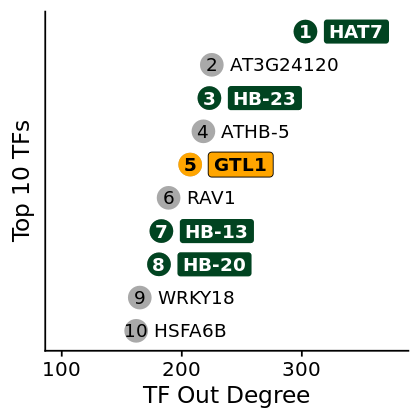

In [7]:
options(repr.plot.width=3.5, repr.plot.height=3.5)

## add labels for HAT7 and GTL1 family 

# to highlight 
HAT7_degree <- filter(BL2hr_elong_cortex_10, name %in% c("HAT7", "HB-23", "HB-13", "HB-20"))
GTL1_degree <- filter(BL2hr_elong_cortex_10, name %in% c("GTL1"))


(deg_plot <- 
  ggplot(BL2hr_elong_cortex_10, 
         aes(y=fct_reorder(name, degree_out), 
             x=degree_out)) + 
  geom_point(color="darkgrey", size=6) + 
  geom_point(data=HAT7_degree,
             aes(y=name,x=degree_out),size=6, color="#014421") + 
   geom_point(data=GTL1_degree,
             aes(y=name,x=degree_out),size=6, color="#FFA500") + 
  theme_cowplot() + 
  xlab("TF Out Degree") + 
  ylab("Top 10 TFs") + 
 scale_x_continuous(limits=c(100, 375)) + 
  geom_text(data = BL2hr_elong_cortex_10, nudge_x = 15, angle = 0,hjust="left",
                           aes(x = degree_out, y = name, label = name)) +  
 geom_label(data = HAT7_degree, nudge_x = 15, angle = 0,hjust="left",
            fill= "#014421", colour = "white", fontface = "bold",
                           aes(x = degree_out, y = name, label = name)) + 
  geom_label(data = GTL1_degree, nudge_x = 15, angle = 0,hjust="left",
            fill= "#FFA500", colour = "black", fontface = "bold",
                           aes(x = degree_out, y = name, label = name)) + 
  theme(axis.text.y = element_blank(), 
       axis.ticks.y = element_blank()) + 
geom_text(data = BL2hr_elong_cortex_10, nudge_x = 0, angle = 0,color="black",
                           aes(x = degree_out, y = name, label = rank)) + 
 geom_text(data = GTL1_degree, nudge_x = 0, angle = 0,color="black", fontface="bold",
                           aes(x = degree_out, y = name, label = rank)) + 
geom_text(data = HAT7_degree, nudge_x = 0, angle = 0,color="white", fontface="bold",
                           aes(x = degree_out, y = name, label = rank)))

ggsave("./output/Cortex_2_hour_HAT7_HB_GTL1_degree_dot_plot_top_10_with_numbers.pdf", width = 3.5, height = 3.5)